In [34]:
import pandas as pd
import joblib as jb
from sklearn.preprocessing import LabelEncoder

### Import data and models

In [35]:
data = pd.read_csv(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\data\test.csv')

In [36]:
label_engine = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t1\label_engine.pkl')

In [37]:
label_accident = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t1\label_accident.pkl')

In [38]:
# Load ML model
model = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t1\model.pkl')

In [39]:
# Load kmeans
kmeans = jb.load(r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t1\kmeans_3_model.pkl')

In [40]:
df =data.copy()

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


,id,model_year,milage
count,36183.000000,36183.000000,36183.000000
mean,72364.000000,2015.063953,72479.266755
std,10445.276732,5.589336,50714.968252
min,54273.000000,1974.000000,100.000000
25%,63318.500000,2012.000000,31681.000000
50%,72364.000000,2016.000000,65680.000000
75%,81409.500000,2019.000000,102000.000000
max,90455.000000,2024.000000,405000.000000


In [42]:
df.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


### Transformate df

In [43]:
df.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes


In [44]:
df1 = df[['engine', 'accident','milage','model_year']].copy()

In [45]:
df1.head(2)

,engine,accident,milage,model_year
0,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,73000,2014
1,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,None reported,128032,2015


In [46]:
#Funcion para manejar las transformaciones.
def safe_transform(encoder, values):
    transformed_values = []
    for item in values:
        try:
            transformed_values.append(encoder.transform([item])[0])
        except ValueError:
            # Asigna un valor específico para valores no vistos, por ejemplo, -1
            transformed_values.append(-1)
    return transformed_values

In [47]:
df1['engine'] = safe_transform(label_engine, df['engine'])
df1['accident'] = safe_transform(label_accident, df['accident'])

In [48]:
df1.head(3)

,engine,accident,milage,model_year
0,554,1,73000,2014
1,414,1,128032,2015
2,313,1,51983,2015


In [49]:
df1['milage_ratio'] = df1['milage']/df1['model_year']
df1['delta'] = df1['engine'] + df1['accident']

In [50]:
from sklearn.cluster import KMeans
import numpy as np

In [51]:
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [52]:
#kmeans = KMeans(n_clusters=6, random_state=0)
df1["Cluster"] = kmeans.fit_predict(df1)
df1["Cluster"] = df1["Cluster"].astype("category")
df1['Cluster'] = df1['Cluster'].cat.codes

df1.head()

,engine,accident,milage,model_year,milage_ratio,delta,Cluster
0,554,1,73000,2014,36.246276,555,2
1,414,1,128032,2015,63.539454,415,0
2,313,1,51983,2015,25.798015,314,1
3,931,0,29500,2018,14.618434,931,1
4,645,0,90000,2020,44.554455,645,2


In [53]:
import seaborn as sns

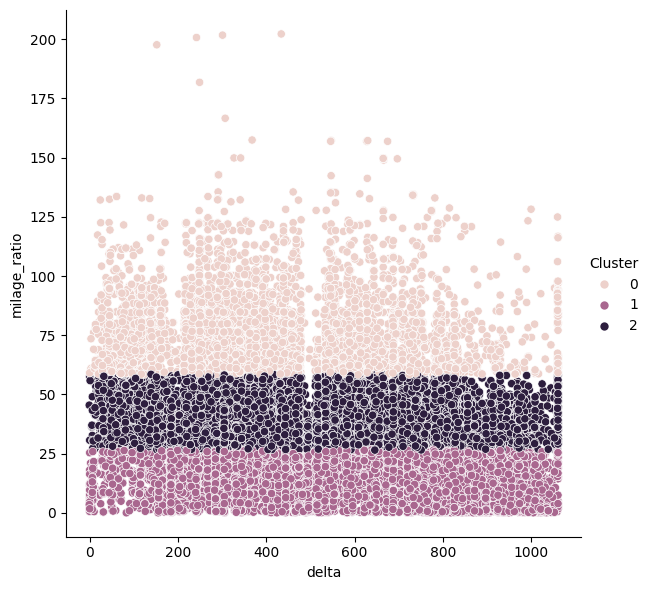

In [54]:
sns.relplot(
    x="delta", y="milage_ratio", hue="Cluster", data=df1, height=6,
)

In [55]:
df_id = df.pop('id')

In [56]:
df1.head(2)

,engine,accident,milage,model_year,milage_ratio,delta,Cluster
0,554,1,73000,2014,36.246276,555,2
1,414,1,128032,2015,63.539454,415,0


In [57]:
X = df1.copy()

In [58]:
predictions = model.predict(X)

In [59]:
#Final dataframe
df_f = pd.DataFrame({
    'id':df_id,
    'price': predictions
})

In [60]:
df_f['price'] = round(df_f['price'],2)

In [61]:
df_f.head(10)


,id,price
0,54273,23081.47
1,54274,19682.70
2,54275,29682.12
3,54276,52887.77
4,54277,37570.39
5,54278,82432.41
6,54279,45864.19
7,54280,37823.49
8,54281,13376.43
9,54282,57545.76


In [63]:
df_f.to_csv('113_Submission_File.csv', index=False)